**שימו לב**: על מנת להריץ את התאים ב-Live Code, יש לייבא תחילה את ספרית `numpy` ע"י הרצת השורת הבאה:

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import utils.load_auxilary_files # This will load the files used for this notebook

['dog_noised.png', 'sunday.txt', 'orders_3_2024.csv', 'dialation_2.png', 'woman_noised.png', 'erosion_2.png', 'infile1.txt', 'notebook_resources.zip', 'countries-of-the-world.csv', 'ex1.csv', 'StudentsGrades.csv', 'out.txt', 'dog.png', 'foods.txt', 'dialation.png', '__MACOSX', 'evil_morty_segmentation.png', 'products2.csv', 'orders_2_2024.csv', 'evil_morty_1.png', 'monday.txt', 'ship.png', 'koala.png', 'baby.png', 'erosion.png', 'evil_morty_change_noised.png', 'orders_4_2024.csv', 'ex2.csv', 'evil_morty_change.png', 'evil_morty_change_3.png', 'infile2.txt', 'witcher_1.csv', 'witcher_2.csv']


# עיבוד תמונה

בחלק זה נכיר יכולות נוספות של ספריית `numpy` - מיסוך (masking) פעולות לאורך ציר של מטריצה. נדגים פעולות אלו על-ידי שימושן בעיבוד תמונות. נראה כיצד מותחים תמונה, מכהים אותה, ומוסיפים לה  רעש.

## סינון מערך באמצעות פעולת מיסוך (Masking)

Mask (מסכה) היא **מערך בוליאני** שמשמש כדי לבחור אילו איברים ממערך אחר (בעל אותם ממדים) ייכללו בפעולה מסוימת, ואילו יישארו מוסתרים או יתעלמו מהם.

אפשר לחשוב על מערך זה כמו מסננת או שכבה אטומה עם חורים : החורים חושפים חלק מהמידע, בעוד שאר האזורים מכוסים. 

נניח שיש לנו וקטור `s = np.arange(5)` המייצג סדרה בת חמישה איברים.
ניצור מסכה באותו אורך, `m = np.arange(5) % 2 == 0`. זהו מערך בוליאני באורך 5. המקומות בהם הערך הוא `True` מציינים אילו איברים יש לכלול בחישוב, ו־`False` מציינים על אילו איברים לדלג.

כדי להפעיל את המסכה, נשתמש בתחביר `s[m]`.
אפשר להשתמש בגישה הזו לא רק כדי לשלוף איברים מסוימים, אלא גם כדי לבצע עליהם פעולות — לדוגמא, להגדיל רק את האיברים הזוגיים או לאפס איברים שאינם עומדים בתנאי מסוים.

למטה נבחן כמה דוגמאות נוספות.

נתחיל מהגדרת מערך מסדרה כלשהי:

In [2]:
a = np.arange(15)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


כעת נבנה לו Mask בעל אותם מימדים:

In [3]:
mask = (a%3 == 0)
print(mask)

[ True False False  True False False  True False False  True False False
  True False False]


באמצעות הMask, ניתן להחזיר את האיברים שבמיקומם יש `True` בMask:

In [4]:
print(a[mask])

[ 0  3  6  9 12]


בנוסף, ניתן **לבצע פעולות רק על איברים שעברו את הסינון**.  
בדוגמא להלן נהפוך **רק** את האיברים שמתחלקים ב-3 לשליליים:

In [5]:
a[mask] *= -1
print(a)

[  0   1   2  -3   4   5  -6   7   8  -9  10  11 -12  13  14]


בעיבוד תמונה יש לMasking שימושים רבים מכיוון שניתן באמצעותו לעשות פעולות על איזורים מסוימים בתמונה.

בדוגמא להלן, הפונקציה `segment_image` מקבלת תמונה `im_mat` בגווני אפור וערך סף מסוים `th`, ויוצרת תמונה שחור לבן ע"י הפעלת סף (th) על ערכי הבהירות הפיקסלים.  



In [6]:
def segment_image(im_mat, th):
    new_mat = np.zeros(im_mat.shape)
    new_mat[im_mat >= th] = 255
    return new_mat


ננתח יחד את הפעולות המתבצעות בכל שלב בפונקציה:
1. בשורה הראשונה הפונקציה מאתחלת מטריצה חדשה של אפסים (כלומר, מטריצה שונה) בעלת אותו גודל כמו המטריצה המקורית
2. בשורה השניה מתבצע Masking על גבי המטריצה השחורה לפי המיקומים בהם הבהירות בתמונת הקלט הייתה גבוהה מ`th`. פעולת Masking זו משתמשת להשמת הערך 255
במילים פשוטות, בשורה השניה אנו שמים במטריצה השחורה 255 בכל מקום בו הערך במטריצה המקורית גבוה מ`th`
3. לבסוף, אנו מחזירים את מטריצה החדשה שיצרנו


In [7]:
im_dog = imageio.v3.imread('files/dog.png')
new_image= segment_image(im_dog, 125)
print(new_image)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]]


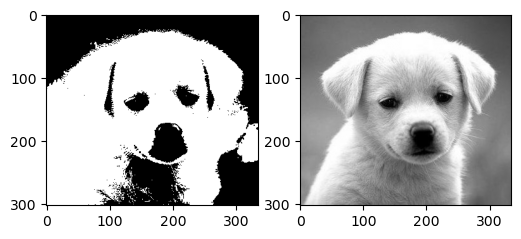

In [8]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.show()

## ביצוע פעולות על מימד/ציר (axis) אחד של המטריצה

ביחידות הקודמות ראינו את מתודת `sum`, הסוכמת את איברי המטריצה. לדוגמא: 

In [9]:
a = np.array([[4, 2 , 5], [1, 3, 1]])
print(a)

[[4 2 5]
 [1 3 1]]


In [10]:
print(a.sum())

16


כעת, נניח שנרצה לבצע פעולה זו על מימד אחד של המטריצה.   
לדוגמא, במקום לסכום את כלל איברי המטריצה, נרצה לסכום את השורות או את העמודות בלבד. 

על מנת לעשות זאת, נוכל להשתמש בפרמטר `axis` במתודה `sum`, המייצג את הציר עליו יש המטריצה. עבור מטריצה דו מימדית קיימים 2 ערכים אפשריים: 0 לשורות ו-1 לעמודות

In [11]:
print("axis=0: ", a.sum(axis=0))
print("axis=1: ", a.sum(axis=1))

axis=0:  [5 5 6]
axis=1:  [11  5]


```{admonition} **שימו לב**
:class: error

במקרה שלנו המשמעות של סכימת השורות/עמודות יכולה מעט להיות לא איטואיטיבית. מה שקורה בפועל הוא שהפעולה מתבצעת בין השורות כאשר `axis=0`, ובין העמודות כאשר `axis=1`.

כך שאם לדוגמא, `axis=0`, נקבל וקטור באורך של שורה בודדת במטריצה המקורית (שזה בעצם מספר העמודות שהיו בה).   
במילים אחרות, ניתן לחשוב על `axis=0` כפעולה הנעשית על האיברים הנמצאים באותו מיקום בין שורות שונות. באופן דומה ניתן לחשוב על פעולות בין האיברים שנמצאים באותו מיקום בעמודות שונות כאשר `axis=1`.

```

נראה כעת דוגמא של שימוש ב`axis`. הפעם בפונקציית הספרייה `np.sort`.   
בקטע קוד זה נמיין עם `axis=0`. כלומר מיון יתבצע בין שורות שונות, ונקבל **מיון של עמודות המטריצה**.

In [12]:
a = np.array([[4, 2 , 5], [1, 3, 1]])
print("The original array: \n", a)
b = np.sort(a, axis=0) # Return new sorted array. equivalent to the "sorted" built-in function
print("New sorted array with axis=0: \n", b)

The original array: 
 [[4 2 5]
 [1 3 1]]
New sorted array with axis=0: 
 [[1 2 1]
 [4 3 5]]


דרך נוספת למיין מערכים היא באמצעות המתודה `sort` של מערכי `numpy` (שימו לב שזוהי מתודה שונה מ`sort` של המחלקה `list`).   
בקריאות הללו המיון יתבצע in-place.

In [13]:
a.sort(axis=1) # In-place sorting of the array. equivalent to the "sort" method in lists
print("In-place sorting of the array with axis=1: \n",a)

In-place sorting of the array with axis=1: 
 [[2 4 5]
 [1 1 3]]


כעת נדגים כיצד לכווץ תמונה **לאורך ציר מסוים**.

לפניכם הפונקציה `squeeze_image`, המקבלת כקלט את התמונה `im`, ומספר שלם `factor` המייצג את פקטור הכיווץ.  
הפונקציה תחזיר **תמונה חדשה** שבה כל עמודה היא הממוצע של `factor` עמודות מהתמונה המקורית.

לדוגמא, עבור תמונה בגודל (10,12) ופקטור 4, תוחזר תמונה בגודל (10,3): 
- העמודה הראשונה בתמונת הפלט תהיה ממוצע העמודות הראשונה עד הרביעית במטריצת הקלט
- העמודה השניה בתמונת הפלט תהיה ממוצע העמודות החמישית עד השמינית במטריצת הקלט
- העמודה הראשונה בתמונת הפלט תהיה ממוצע העמודות ההתשיעית עד השתיים-עשרה במטריצת הקלט

ודאו כי אתם מבינים כל שורה בפתרון. נסו להכניס שינויים את הקוד על מנת לוודא כי הבנתם אותו כשורה.

In [14]:
def squeeze_image(im,factor):
    new_n = im.shape[0]
    new_m = im.shape[1] // factor
    new_mat = np.zeros((new_n,new_m))
    for j in range(new_mat.shape[1]):
        curr_range = range(j*factor,min((j+1)*factor,im.shape[1]))
        new_mat[:,j] = im[:,curr_range].mean(axis=1)
    return new_mat

In [15]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = squeeze_image(im_dog,4)

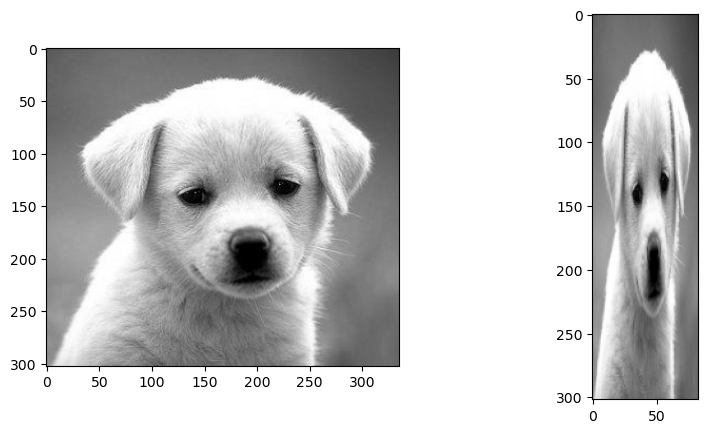

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

```{admonition} **עצרו וחישבו:**  למה משמש המינימום בחלק הזה בקוד min((j+1)*factor, im.shape[1])?
:class: dropdown, caution
המינימום מבטיח שלא נחרוג מגבולות התמונה המקוריים, גם אם כמות העמודות בתמונה המקורית לא מתחלק ב`factor`.

```

## הכהיית תמונה

כעת נראה כיצד להפוך תמונה קיימת לכהה יותר.   
בחנו תחילה את מימוש הפונקציה `darken_image`, המקבלת תמונה ומחזירה אותה כהה יותר בכמות יחידות הבהירות שהועברו ב-`dark_strength`.

In [17]:
def darken_image(im,dark_strength=150):
    dark_im = im.copy()
    dark_im = im-dark_strength
    return dark_im

In [18]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,100)

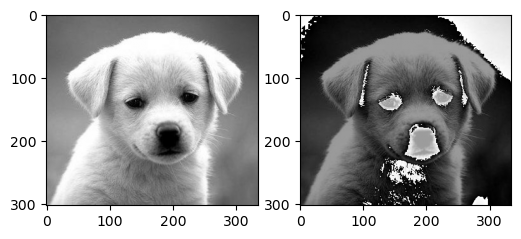

In [19]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

```{admonition} **עצרו וחישבו:** למה קיבלנו ערכים בהירים לא צפויים?
:class: dropdown, caution
בעבודה על תמונות, הטיפוס של איברי המטריצה הוא `uint8`. לכן הערכים בכל תא במטריצה חייבים להיות בטווח 0-255.
כאשר ביצענו פעולה חשבונית שמוציאה את המספר מהטווח, התרחשה **גלישה מספרית (numerical overflow)**. כלומר, בוצע מודולו (`%`) 256 כדי "להחזיר" את הערך חזרה לטווח 0-255.
כלומר:
- אם התוצאה גדולה מ־255 - הערך "מתגלגל" חזרה ונהיה כהה
- אם התוצאה מעט שלילית - הערך "מתגלגל" ויוצר בהירות לא צפויה
```


בחנו את הדוגמאות הבאות וודאו כי הבנתם מדוע מקבלים את הערכים המודפסים:

In [20]:
print(np.uint8(246) + np.uint8(20))

10


In [21]:
print(np.uint8(10) - np.uint8(20))

246


כדי לפתור את הבעיה, נמיר את הטיפוסים לטיפוס `int` רגיל **לפני** ביצוע הפעולה באמצעות `np.int_`:  

In [22]:
a = np.uint8(10)
b = np.uint8(20)
c = np.int_(a) - np.int_(b)
print(c, type(c))

-10 <class 'numpy.int64'>


כעת נוכל להגדיר שכל ערך מתחת ל0 יקבל 0 וכל ערך שמעל 255 יוחלף ב255. על מנת לעשות זאת במטריצה נשתמש בפונקציה `(mat, a)np.maximum`, המחזירה מטריצה חדשה בה עבור כל איבר במטריצה `mat` נלקח הערך המקסימלי בין האיבר ל`a`

להלן מימוש `darken_image` לאחר התיקון:

In [23]:
def darken_image(im,dark_strength):
    dark_im = im.copy()
    dark_im = np.maximum(np.int_(im)-dark_strength,0)
    return np.uint8(dark_im) # Do not forget to convert back to uint8 to save memory!

In [24]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,150)

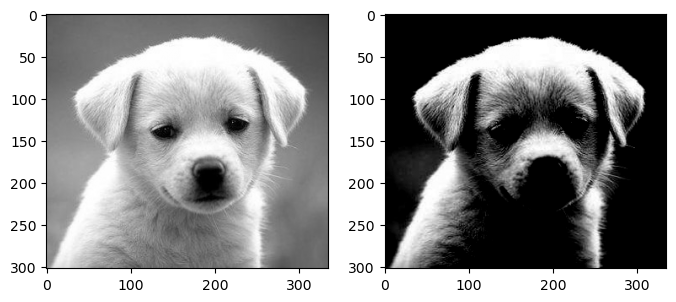

In [25]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

### תרגול

ממשו את הפונקציה `lighten_image` אשר מבהירה את התמונה באופן דומה. ודאו שאינכם מבצעים numerical overflow.

In [26]:
def lighten_image(im,dark_strength=150):
    pass

TypeError: Image data of dtype object cannot be converted to float

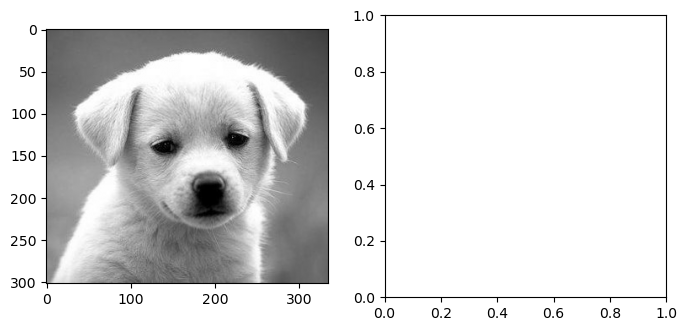

In [27]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = lighten_image(im_dog,150)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

## רעש בתמונה (Image Noising)

**מה זה רעש בתמונה?**  
רעש בתמונה הוא מצב בו חלק מהפיקסלים סוטים מערכם האמיתי. אפשר להסתכל על רעש גם כתוספת של ערכים אקראיים לפיקסלים.  
התוצאה נראית כמו "גרגירים" או נקודות בהירות או כהות שמפוזרות על פני התמונה.  

**מתי זה קורה?**  
- באופן טבעי: רעש יכול להופיע בצילום אמיתי בגלל חיישן מצלמה לא יציב, תאורה חלשה, או הפרעות אלקטרוניות.  
- באופן מלאכותי: מוסיפים רעש במכוון, למשל כחלק מניסויים בעיבוד תמונה. למשל, כדי לבדוק על כמה האלגוריתם יודע לזהות אובייקטים בתמונות רועשות.  

כעת נראה איך אפשר **להוסיף רעש אקראי לתמונה** בעזרת `numpy`.


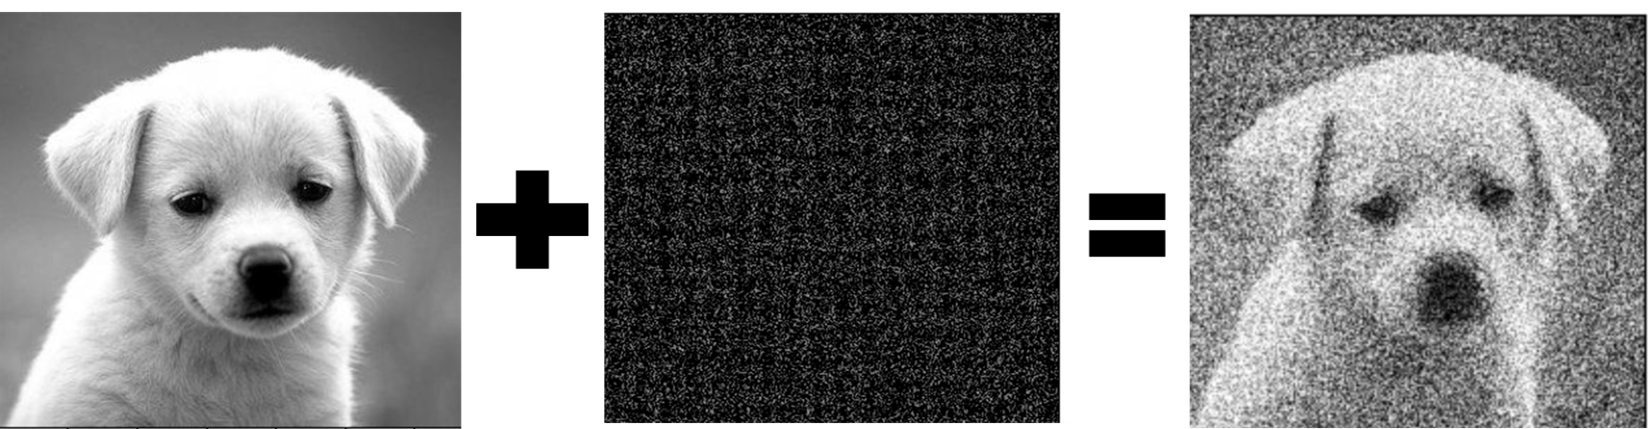

נתבונן בפונקציה `bright_noise_im`, אשר מוסיפה רעש בהירות (brightness noise) לתמונה.  
הפונקציה פועלת על־ידי הוספת ערך אקראי לכל פיקסל — מספר שלם בין 0 ל־50 - כך שכל פיקסל בתמונה נעשה בהיר יותר במידה שונה מעט. 

התוצאה היא תמונה שנראית "מגורענת" או "רועשת" מבחינת הבהירות שלה.

In [28]:
def bright_noise_im(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = im + noise # np.clip(im + noise, 0, 255)
    return noisy_image

כדי לראות את פעולת הפונקציה, ניצור תמונה אפורה (כולה מכילה את הערך 125). נראה כיצד פונקציית הרעש שלנו משפיעה על התמונה הזו:

In [29]:
im = np.ones((100,100), dtype=np.uint8)*125 # plt.imread('files/dog.png')
new_image = bright_noise_im(im,50)

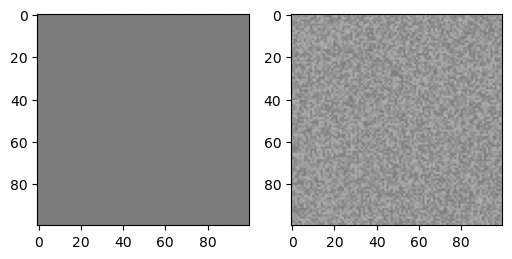

In [30]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

לכאורה, הרעש יכול רק להבהיר כל פיקסל בתמונה, זאת מכיוון שהוא מוסיף ערך אי-שלילי לכל פיקסל.

כעת ננסה להוסיף את הרעש לתמונה שלנו:

In [31]:
im_dog = imageio.v3.imread('files/dog.png')
# noisy_image_no_overflow = noise_im_no_overflow(im_dog,50)
bright_noisy_image = bright_noise_im(im_dog,100)

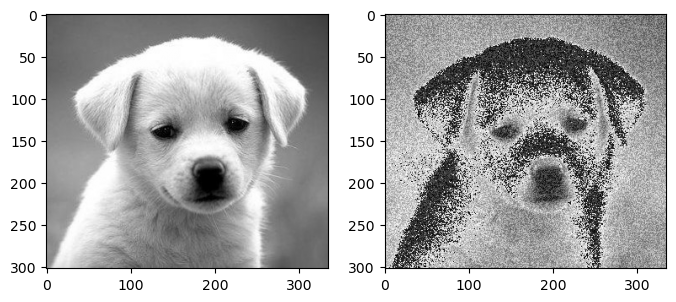

In [32]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(bright_noisy_image,vmin=0, vmax=255, cmap=plt.cm.gray)

מה קרה לנו כאן? נראה שחלק מהפיקסלים שהיו במקור בהירים הפכו למאוד כהים.
כמו בדוגמא של הכהיית התמונה, גם פה התרחשה גלישה מספרית (Numerical overflow). 

על מנת לתקן זאת, נוכל שוב להגביל את טווח המספרים כך שיהיה בין 0 ל-255.   
הפעם נעשה זאת באמצעות המתודה `np.clip`, התוחמת את ערכים מערך נתון בין 2 ערכים (קראו עליה ברחבה [פה](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)):

In [33]:
def bright_noise_im_no_overflow(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = np.clip(np.int_(im) + np.int_(noise), 0, 255) # This is the modified line, where we clip the values to range between 0 to 255
    return noisy_image

ואם היינו רוצים רעש שיכול גם להכהות וגם להבהיר פיקסלים?

מכיוון שאנו משתמשים ב`clip`, אנו למעשה תוחמים את ערכים גם מלעלה וגם ולמטה.    
לכן, כל שעלינו לעשות זה רק לשנות את טווח הרעש:

In [34]:
def noise_im(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8) 
    noisy_image = np.clip(np.int_(im)+noise-noise_strength//2, 0, 255)
    return noisy_image

במימוש החדש, **הזזנו** את טווח המספרים מהם הוגרל הרעש בכך שחיסרנו `noise_strength//2`.   
בעבר טווח ערכי השינוי היה מ0 עד `noise_strength+1`, וכעת הטווח השתנה ל`-noise_strength//2` עד `noise_strength//2`.

כך שלדוגמא, עבור הקלט `noise_strength=100`  הרעש שיתווסף לתמונה יהיה בין `-50` ל`50`

In [35]:
im_dog = imageio.v3.imread('files/dog.png')
noisy_im = noise_im(im_dog,100)

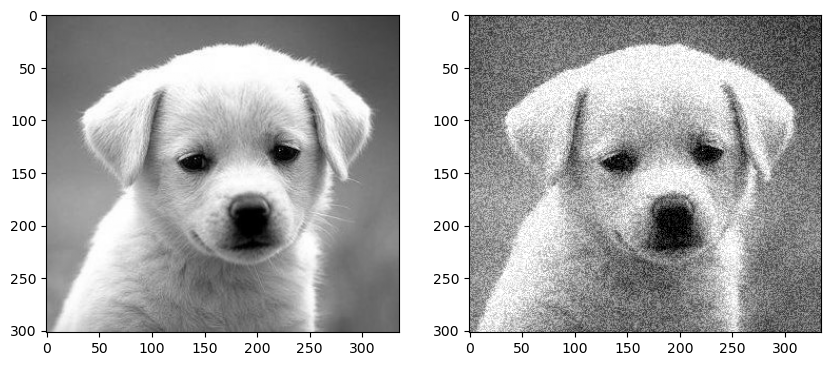

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(noisy_im,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()